<a href="https://colab.research.google.com/github/PedroMaarins/UniCarioca-Trabalhos/blob/main/APS2_M%C3%A9todos_Num%C3%A9ricos_Computacionais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Aps2 - Métodos numéricos computacionais**

---

- Carregar uma imagem e transformá-la em um matriz de valores 
reais.

- Aplicar a Decomposição da matriz por Valores Singulares.

- Manter apenas os valores que representam: 60%, 70% e 80% dos 
Valores Singulares.

- Apresentar a imagem transformada com a aplicação do item (c).

* link da imagem: https://st.depositphotos.com/1016440/2534/i/600/depositphotos_25344733-stock-photo-sunrise-at-the-beach.jpg

---

  * Nome: Pedro Silva
  * Turma: 133R-2022/2

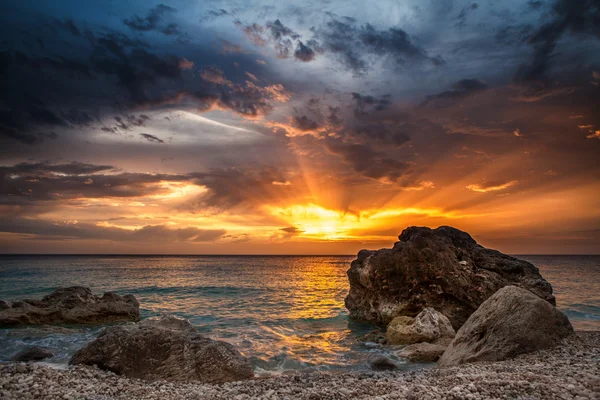

Dimensões do canal r: (400, 600)
Carregando próxima imagem...



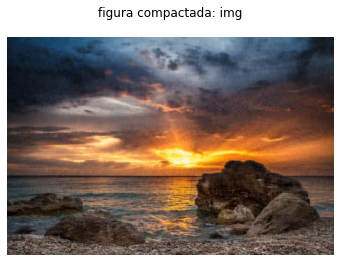

Valor de K para a imagem a cima = 60
Dimensões do canal r: (400, 600)
Carregando próxima imagem...



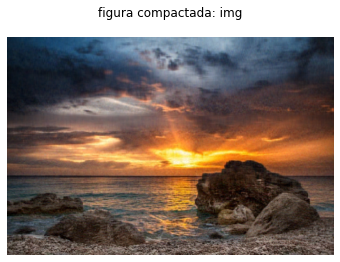

Valor de K para a imagem a cima = 70
Dimensões do canal r: (400, 600)
Carregando próxima imagem...



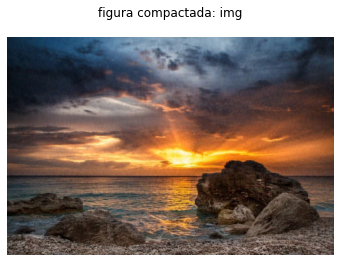

Valor de K para a imagem a cima = 80


In [8]:
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
import cv2
from numpy.linalg import svd
from PIL import Image
import os
from skimage import io
from google.colab.patches import cv2_imshow

def compress_image(img_name, img, k):

    r = img[:, :, 0] 
    g = img[:, :, 1]  
    b = img[:, :, 2] 

    ur, sr, vr = svd(r, full_matrices=False)
    ug, sg, vg = svd(g, full_matrices=False)
    ub, sb, vb = svd(b, full_matrices=False)

    print('Dimensões do canal r: {}'.format(r.shape))

    rr = np.dot(ur[:, :k], np.dot(np.diag(sr[:k]), vr[:k, :]))
    rg = np.dot(ug[:, :k], np.dot(np.diag(sg[:k]), vg[:k, :]))
    rb = np.dot(ub[:, :k], np.dot(np.diag(sb[:k]), vb[:k, :]))

    print("Carregando próxima imagem...\n")
    
    rimg = np.zeros(img.shape)
    
    rimg[:, :, 0] = rr
    rimg[:, :, 1] = rg
    rimg[:, :, 2] = rb
    
    for ind1, row in enumerate(rimg):
        for ind2, col in enumerate(row):
            for ind3, value in enumerate(col):
                if value < 0:
                    rimg[ind1, ind2, ind3] = abs(value)
                if value > 255:
                    rimg[ind1, ind2, ind3] = 255

    compressed_image = rimg.astype(np.uint8)

    plt.title("figura compactada: " + img_name + "\n")
    plt.imshow(compressed_image)
    plt.axis('off')
    plt.show()
    cv2.imwrite("Imagem/comp-" + str(img_name) + ".jpg", compressed_image)

origem = ("https://st.depositphotos.com/1016440/2534/i/600/depositphotos_25344733-stock-photo-sunrise-at-the-beach.jpg")
image = io.imread(origem)
data = asarray(image)
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2_imshow(RGB_img)
k = [60, 70, 80]
for x in range(len(k)):
 compress_image("img", image, k[x])
 print(f'Valor de K para a imagem a cima = {k[x]}')